In [ ]:
pip install pandas numpy seaborn matplotlib scikit-learn

In [2]:
import pandas as pd
import numpy as np

In [23]:
data1 = pd.read_csv('emg.csv')
data2 = pd.read_csv('facial_skin_temperature.csv')
data3 = pd.read_csv('gsr.csv')
data4 = pd.read_csv('heart_rate.csv')
data5 = pd.read_csv('imu_chair_back.csv')
data6 = pd.read_csv('imu_chair_seat.csv')
data7 = pd.read_csv('imu_right_hand.csv')
data8 = pd.read_csv('imu_left_hand.csv')
data9 = pd.read_csv('spo2.csv')
semua_data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9])

In [24]:
import pandas as pd
import numpy as np

# Cek missing values
print(semua_data.isnull().sum())

# Imputasi mean, median, dan modus
data_mean = semua_data.fillna(semua_data.mean())
data_median = semua_data.fillna(semua_data.median())
data_mode = semua_data.fillna(semua_data.mode().iloc[0]) 

# Cek hasil imputasi
print(semua_data.isnull().sum())
print(semua_data.isnull().sum())
print(semua_data.isnull().sum())

time                          0
emg_right_hand             7627
emg_left_hand              7627
facial_skin_temperature    8090
gsr                        7627
heart_rate                 8103
linaccel_x                 4411
linaccel_y                 4411
linaccel_z                 4411
gravity_x                  4411
gravity_y                  4411
gravity_z                  4411
gyro_x                     4411
gyro_y                     4411
gyro_z                     4411
euler_x                    4411
euler_y                    4411
euler_z                    4411
quaternion_w               4411
quaternion_y               4411
quaternion_x               4411
quaternion_z               4411
spo2                       7637
dtype: int64
time                          0
emg_right_hand             7627
emg_left_hand              7627
facial_skin_temperature    8090
gsr                        7627
heart_rate                 8103
linaccel_x                 4411
linaccel_y                 

time                          0
emg_right_hand               39
emg_left_hand                27
facial_skin_temperature       2
gsr                           0
heart_rate                    0
linaccel_x                  883
linaccel_y                   11
linaccel_z                  650
gravity_x                  2134
gravity_y                     0
gravity_z                     0
gyro_x                      694
gyro_y                     2010
gyro_z                     1577
euler_x                       0
euler_y                    2134
euler_z                       0
quaternion_w                  0
quaternion_y               2000
quaternion_x               1152
quaternion_z               1072
spo2                        108
dtype: int64


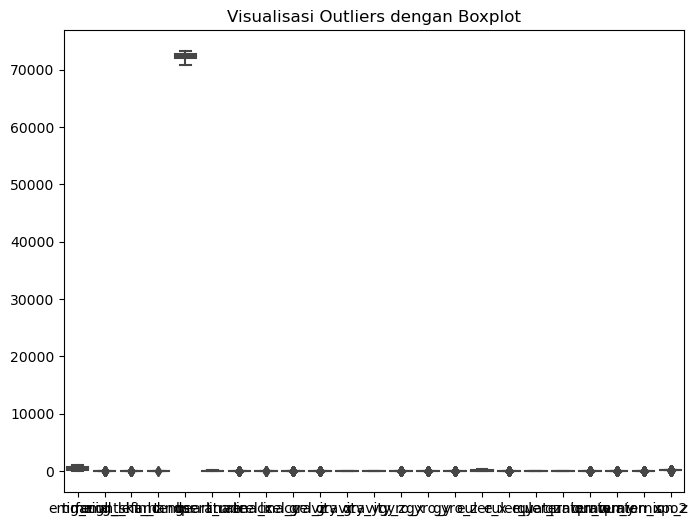

In [29]:
# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return is_outlier

# Deteksi outliers
outliers = detect_outliers_iqr(semua_data.select_dtypes(include=[np.number]))  # Hanya kolom numerik
print(outliers.sum())  # Jumlah outliers per kolom

# Visualisasi outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=semua_data.select_dtypes(include=[np.number]))
plt.title('Visualisasi Outliers dengan Boxplot')
plt.show()

